# Compute the simple ratio Rossby radii over ∆x for CREG12.L75 grid

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap

%matplotlib inline

>> Function definition START

In [2]:
def Arc_Bat(ztype='isol1000') :

        locpath='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG12.L75/GRID/'
        locfile='bathymetry_CREG12_V3.3_CT20180612Larger_ct20190102.nc'
        fieldbat=Dataset(locpath+locfile)
        lon  = np.squeeze(fieldbat.variables['nav_lon'])
        lat  = np.squeeze(fieldbat.variables['nav_lat'])
        My_var = np.squeeze(fieldbat.variables['Bathymetry'])

        spval = 0.
        My_var= np.ma.masked_where(My_var <= spval,My_var)

        if ztype == 'isol1000' :
                vmin=1000. ; vmax=2000.
                contours=[1000.]
                limits=[vmin,vmax]
                myticks=[1000.]
        elif ztype == 'isol1500' :
                vmin=1500. ; vmax=2000.
                contours=[1500.]
                limits=[vmin,vmax]
                myticks=[1500.]
        elif ztype == 'isomonarc' :
                vmin=500. ; vmax=4000.
                contours=[500.,2000.,4000.]
                limits=[vmin,vmax]
                myticks=[500.,2000.,4000.]
        elif ztype == 'isol500' :
                vmin=500. ; vmax=500.
                contours=[500.]
                limits=[vmin,vmax]
                myticks=[500.]
        else:
                vmin=0. ; vmax=8000.
                contours=[100.,500.,1000.,2000.,3000.,3500.,4000.]
                limits=[vmin,vmax]
                myticks=[100.,500.,1000.,2000.,3000.,3500.,4000.]

        #
        #rcParams['text.latex.unicode']=True
        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')
        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
        pal = plt.cm.get_cmap('binary')
        X,Y = m(lon,lat)

        # contour (optional)
        CS2 = m.contour(X, Y, My_var, linewidths=0.5,levels=contours, colors='black', alpha=1.)
        plt.clabel(CS2, CS2.levels, inline=True, fmt='%.0f', fontsize=3)

        return m, X, Y


In [3]:
def Arc_plot(lon,lat,tab,contours,limits,myticks=None,name=None,zmy_cblab=None,zmy_cmap=None,filename='test.pdf',zvar=None):
        #
# Les 2 lignes suivantes posent un probleme a l'execution lie a LaTex ....
#       rcParams['text.usetex']=True
#       rcParams['text.latex.unicode']=True
        #rcParams['font.family']='serif'

        plt.rcParams['contour.negative_linestyle'] = 'solid'
        #
        m = Basemap(projection='npstere',boundinglat=65,lon_0=-60, resolution='i')

        if zvar == 'sivolu' or zvar == 'siconc'  or zvar == 'ssh' or zvar == 'socurl' :
                zfontsize=10.
        else:
                zfontsize=6.

        if zvar != 'Bathy' :
                m.drawparallels(np.arange(-90.,91.,5.),labels=[False,False,False,False], size=zfontsize, linewidth=0.3)
                m.drawmeridians(np.arange(-180.,181.,20.),labels=[True,False,False,True], size=zfontsize, latmax=90.,linewidth=0.3)
                m.fillcontinents(color='grey',lake_color='white')

        norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])

        if zmy_cmap != None :
                pal = zmy_cmap
        else:
                pal = plt.cm.get_cmap('coolwarm')
                #pal = plt.cm.get_cmap('terrain')

        X,Y = m(lon,lat)
        C = m.contourf(X,Y,tab,contours,cmap=pal,norm=norm,extend='both')
        if zvar == 'ssh':
                CS=m.contour(X, Y, tab, linewidths=0.5, levels=npy.arange(limits[0],limits[1],5.), colors='k', alpha=0.4)

        ############################################################################################################
        ############################################################################################################
        moorplot=1
        if moorplot == 1 :
                bx_ARCB={'name':'B'  ,'lon_min':-150.,'lon_max':-150.,'lat_min':78.,'lat_max':78.}
                bx_ARCM={'name':'M1' ,'lon_min': 125.,'lon_max': 125.,'lat_min':78.,'lat_max':78.}
                bx_EURA={'name':'EUR','lon_min':  60.,'lon_max':  60.,'lat_min':85.,'lat_max':85.}

                All_box=[bx_ARCB,bx_EURA]
                for box in All_box:
                        lats = [box['lat_min'],box['lat_max']]
                        lons = [box['lon_min'],box['lon_max']]
                        x,y = m(lons,lats)
                        m.scatter(x,y,3,marker='o', color='r')
                        #m.plot(x,y,linewidth=2, color='g')
        ############################################################################################################
        ############################################################################################################

        # colorbar      
        if myticks is None:
                cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8)
        else:
                if zvar == 'votemper' or zvar == 'vosaline' or zvar == 'sivolu' :
                        cbar = plt.colorbar(C,format='%.2f',orientation='vertical',shrink=0.8,drawedges=True)
                else:
                        cbar = plt.colorbar(C,format='%.0f',orientation='vertical',shrink=0.8,drawedges=True)

                cbar.set_label(zmy_cblab,fontsize=zfontsize)
                cl = plt.getp(cbar.ax, 'ymajorticklabels')
                plt.setp(cl, fontsize=zfontsize)

        plt.title(name,fontsize=zfontsize)

        return

>> Function definition END

# CREG12.L75-REF12 Grid

In [5]:
GRIDPATH='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG12.L75/GRID/'
ds_grd=xr.open_dataset(GRIDPATH+'CREG12.L75-REF12_mesh_mask_domain_cfg_20230810_Z.nc')
ds_grd
tmask2D=ds_grd['tmask'].isel(nav_lev=0,time_counter=0)

# Read the initial state based on WOA09

In [7]:
PATHIN='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG12.L75/CREG12.L75-I/'
ds_woa09=xr.open_dataset(PATHIN+'CREG12.L75-REF12_init_gridT.nc')

vosaline=ds_woa09['vosaline'].isel(time_counter=0)
votemper=ds_woa09['votemper'].isel(time_counter=0)

In [8]:
ds_woa09

<xarray.Dataset>
Dimensions:       (y: 1801, x: 1580, nav_lev: 75, time_counter: 1)
Coordinates:
  * nav_lev       (nav_lev) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: y, x
Data variables: (12/22)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    votemper      (time_counter, nav_lev, y, x) float64 ...
    vosaline      (time_counter, nav_lev, y, x) float64 ...
    sossheig      (time_counter, y, x) float64 ...
    vozocrtx      (time_counter, nav_lev, y, x) float64 ...
    ...            ...
    soshfldo      (time_counter, y, x) float64 ...
    soicecov      (time_counter, y, x) float64 ...
    sozotaux      (time_counter, y, x) float64 ...
    sometauy      (time_counter, y, x) float64 ...
    vovvldep      (time_counter, nav_lev, y, x) float64 ...
    vovvle3t      (time_counter, nav_lev, y, x) float64 ...
Attributes:
    file_name:  output.init.nc
    TimeStamp:  19/04/2024 17:34:34 +0200

# Read the Rossby radius based on WOA09 and mean 2005-2015 from REF08 

In [11]:
INP='/home1/datawork/ctalandi/PRE-POST/ROSSBY/'
Rd=xr.open_dataset(INP+'ets.nc')

In [25]:
INP='/home1/datawork/ctalandi/PRE-POST/ROSSBY/'
Rd_REF08=xr.open_dataset(INP+'CREG12.L75-REF08_y2005-2015.RossbyRad.nc')

/home1/datawork/ctalandi/conda-env/Jupyter-Dask/lib/python3.11/site-packages/xarray/core/computation.py:761: RuntimeWarning: divide by zero encountered in log2
  result_data = func(*input_data)


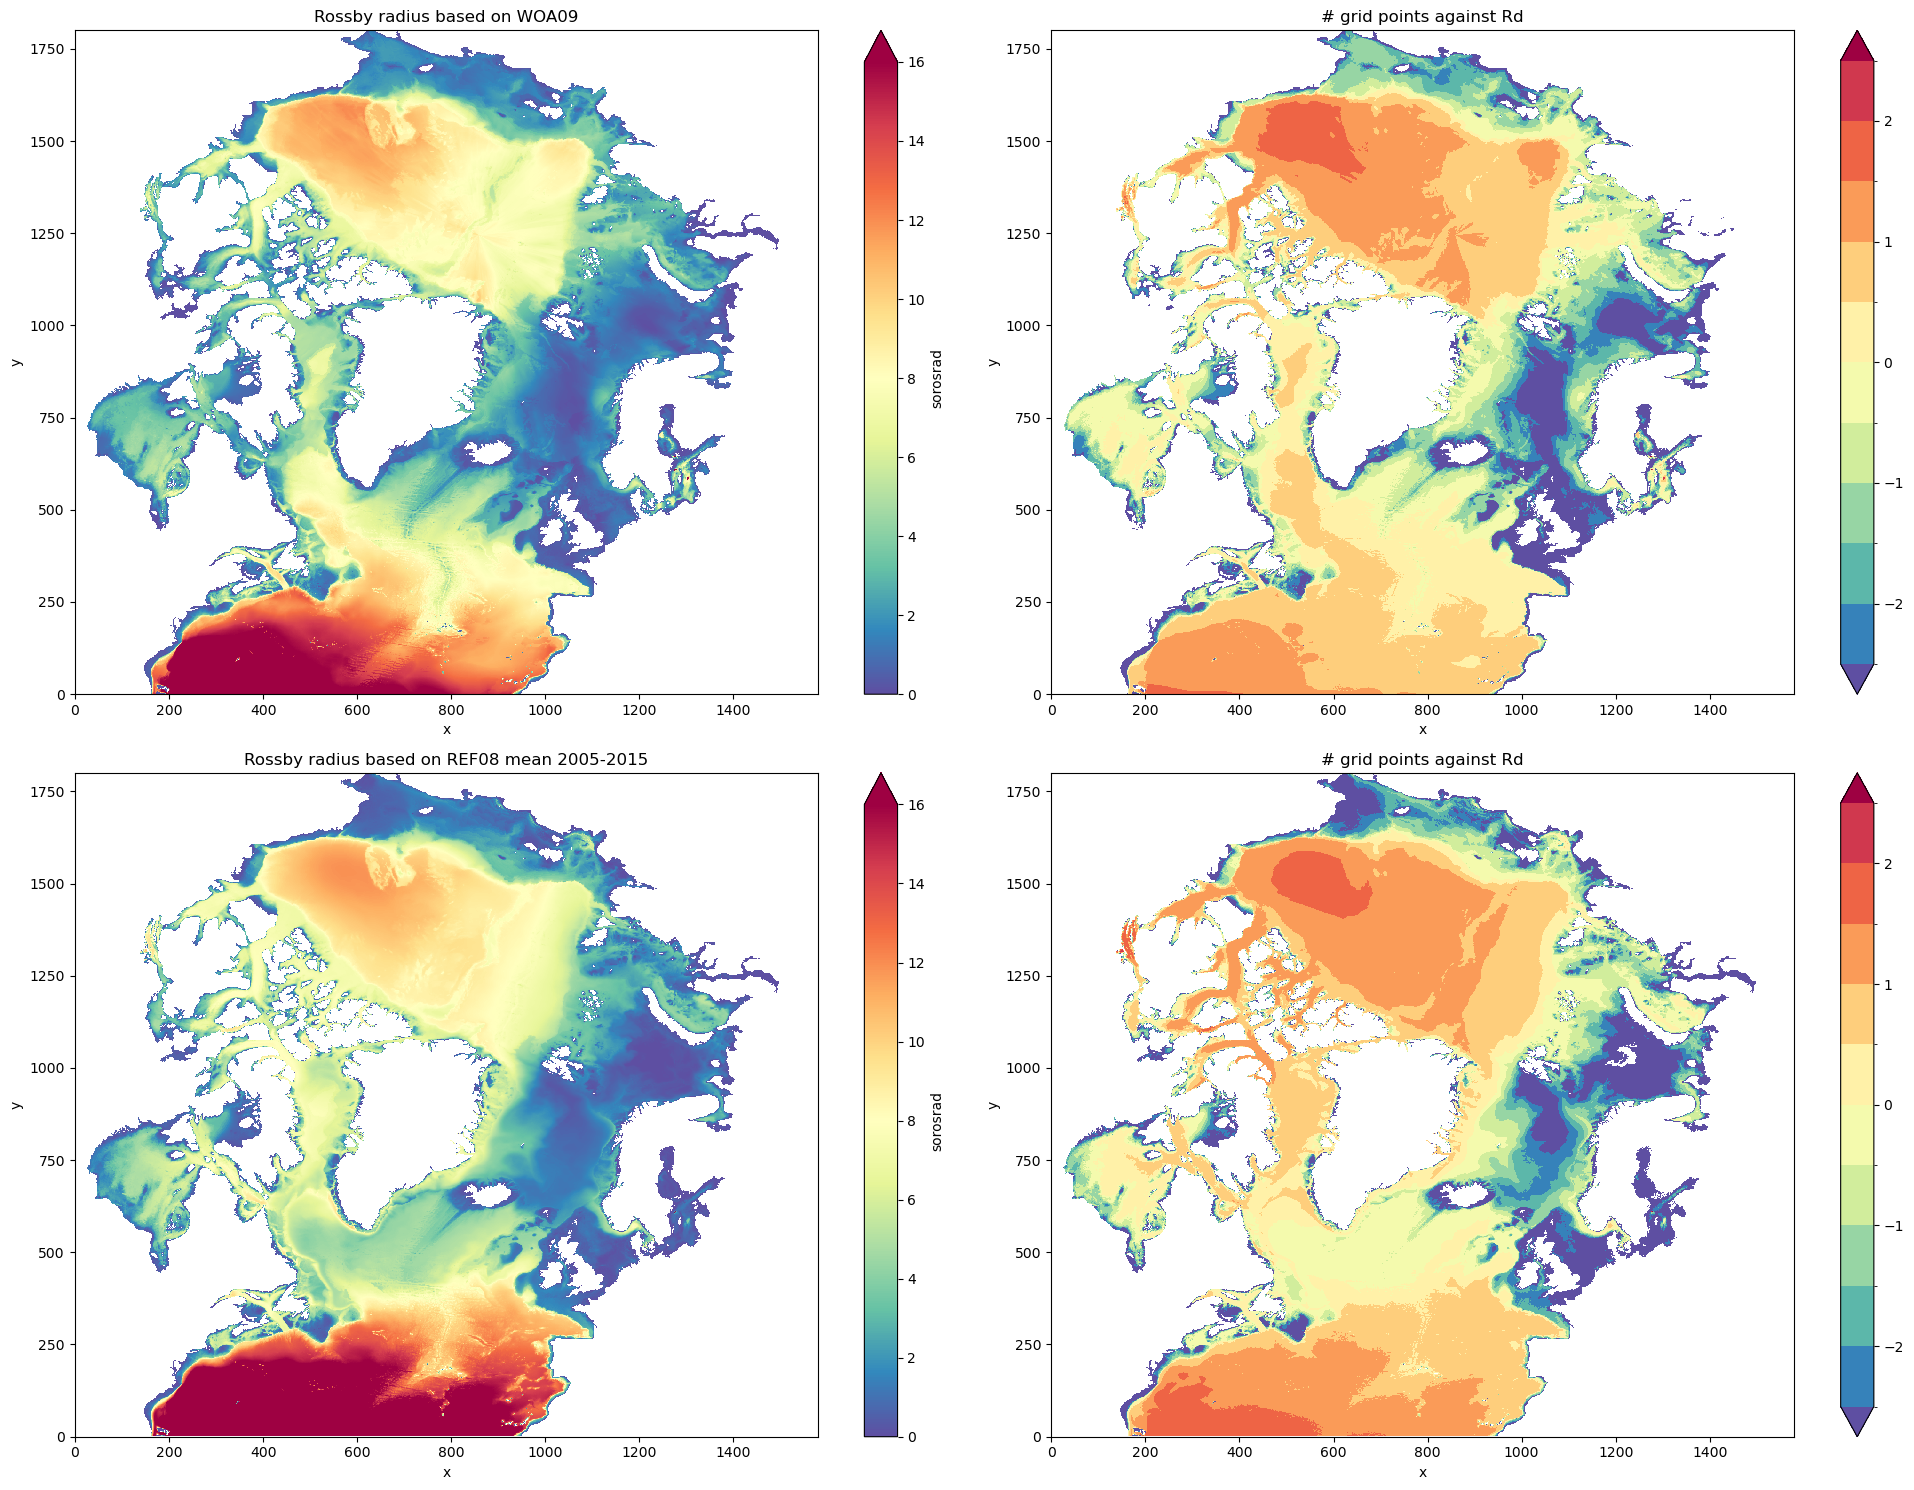

In [38]:
plt.figure(figsize=(20,15))
plt.subplot(221)
(Rd['sorosrad']*1e-3).plot(cmap='Spectral_r',vmax=16.)
plt.title('Rossby radius based on WOA09')
plt.subplot(222)
np.log2(Rd['sorosrad']/ds_grd['e1t']).plot(cmap='Spectral_r',vmin=-2.5,vmax=2.5,levels=11)
plt.title('# grid points against Rd')

plt.subplot(223)
(Rd_REF08['sorosrad']*1e-3).plot(cmap='Spectral_r',vmax=16.)
plt.title('Rossby radius based on REF08 mean 2005-2015')
plt.subplot(224)
np.log2(Rd_REF08['sorosrad'].isel(time_counter=0)/ds_grd['e1t'].isel(time_counter=0)).plot(cmap='Spectral_r',vmin=-2.5,vmax=2.5,levels=11)
plt.title('# grid points against Rd')

plt.tight_layout()

if False : plt.savefig('CREG12.L75-REF08_RossbyRad.png',dpi=300)

In [53]:
dsout=xr.Dataset()
#dsout['Rd_woa09']=(('y','x'),np.array(Rd['sorosrad'].isel(time_counter=0)))
dsout['Rd_woa09']=(('y','x'),Rd['sorosrad'].isel(time_counter=0).data)
dsout['Rd_ref08']=(('y','x'),Rd_REF08['sorosrad'].isel(time_counter=0).data)
dsout['Ratio_ref08']=(('y','x'),(Rd_REF08['sorosrad'].isel(time_counter=0)/ds_grd['e1t'].isel(time_counter=0)).data)
dsout['Ratio_wo09']=(('y','x'),(Rd['sorosrad'].isel(time_counter=0)/ds_grd['e1t'].isel(time_counter=0)).data)

dsout.Rd_woa09.attrs['var']='Rossby radius from WOA09 climatology'
dsout.Rd_woa09.attrs['units']='m'
dsout.Rd_ref08.attrs['var']='Rossby radius from 2005-2015 mean'
dsout.Rd_ref08.attrs['units']='m'

dsout.Ratio_wo09.attrs['var']='Rossby radius (from woa09) over grid size ratio '
dsout.Ratio_wo09.attrs['units']='-'
dsout.Ratio_ref08.attrs['var']='Rossby radius (from REF08 2005-2015 mean) over grid size'
dsout.Ratio_ref08.attrs['units']='-'

dsout.coords['nav_lon']=(('y','x'),Rd_REF08['nav_lon'].data)
dsout.coords['nav_lat']=(('y','x'),Rd_REF08['nav_lat'].data)

if False: dsout.to_netcdf('./CREG12.L75-REF08_RossbyRad.nc')